In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar los datos del club
df_partidos = pd.read_csv("data/partidos_cebollitas.csv")
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [10]:
# Nueva caracteristica: diferencia de goles (local - visitante)
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Ver resultados 
df_partidos[['tiros_arco_local', 'tiros_arco_visitante', 'diferencia_goles']].head()

,tiros_arco_local,tiros_arco_visitante,diferencia_goles
0,12,6,2
1,12,3,-4
2,10,7,1
3,3,3,-1
4,7,12,2


In [11]:
# Nueva caracteristica_ ratio tiros al arco por porcentaje de posesion (local)
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']

# Ver resultados
df_partidos[['tiros_arco_local', 'posesion_local (%)', 'ratio_tiros_posesion_local']].head()

,tiros_arco_local,posesion_local (%),ratio_tiros_posesion_local
0,12,54,0.222222
1,12,60,0.200000
2,10,55,0.181818
3,3,57,0.052632
4,7,52,0.134615


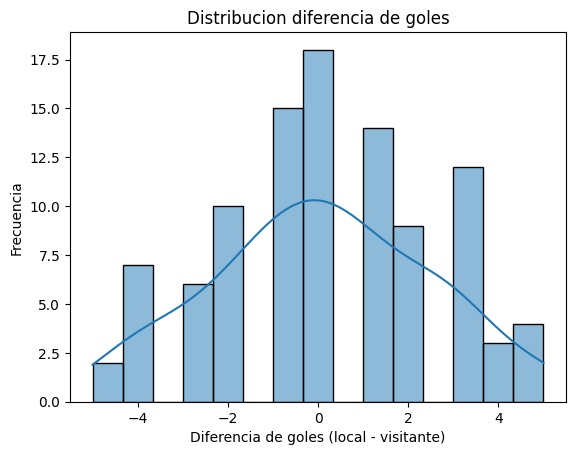

In [12]:
# Histograma de diferencia de goles
sns.histplot(df_partidos['diferencia_goles'], bins = 15, kde = True)
plt.title("Distribucion diferencia de goles")
plt.xlabel('Diferencia de goles (local - visitante)')
plt.ylabel('Frecuencia')
plt.show()

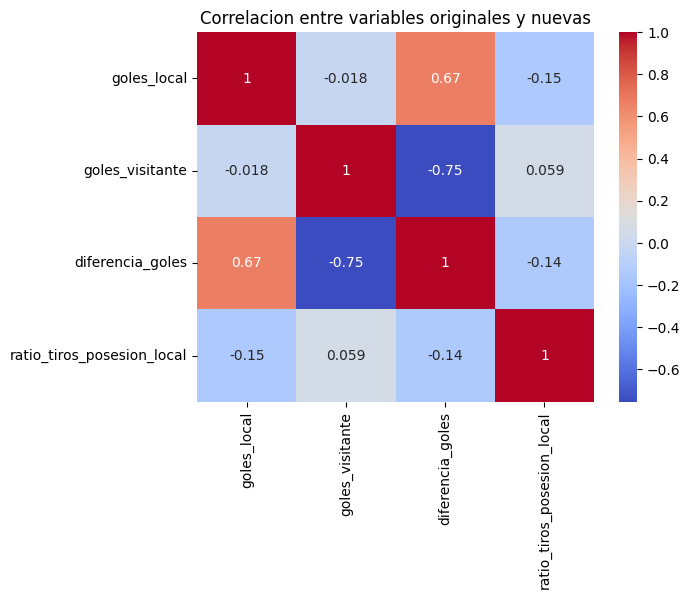

In [14]:
# Analisis de correlaciones
corr_vars = ['goles_local', 'goles_visitante', 'diferencia_goles', 'ratio_tiros_posesion_local']
corr_matrix = df_partidos[corr_vars].corr()

# Mapa de calor
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlacion entre variables originales y nuevas')
plt.show()